### 활성화 함수 (Activation Function)
 - 뉴런을 활성화 함수 없이 그냥 잇기만 하면, 결국 더하기와 곱하기로 이루어진 선형 변환 뿐이라, 선형 변환의 결과물은 선형일 뿐이다.
 - 그래서 비선형을 구현할 수 없어서, Layer 사이사이에 활성화 함수라고 비 선형 함수를 넣어서 비선형 문제를 풀고 싶어했다.
 - 일단 비선형함수도 당연히 미분은 가능하기 때문에 우리는 미분이 가능한 여러 비선형 함수를 사용한다.
 - 그 이전에 미분이 불가능한 함수를 활성화 함수라고 쓰면 미분이 불가능 하니까 Back-Propagation 이고 그냥 Loss 기여치 계산이고 가능할리가 없지...
 - 머신러닝 학습 방식이 Loss를 각각이 얼마나 변화시키는지 변화량을 계산해서 가중치와 편향을 업데이트 하는 방식이다.

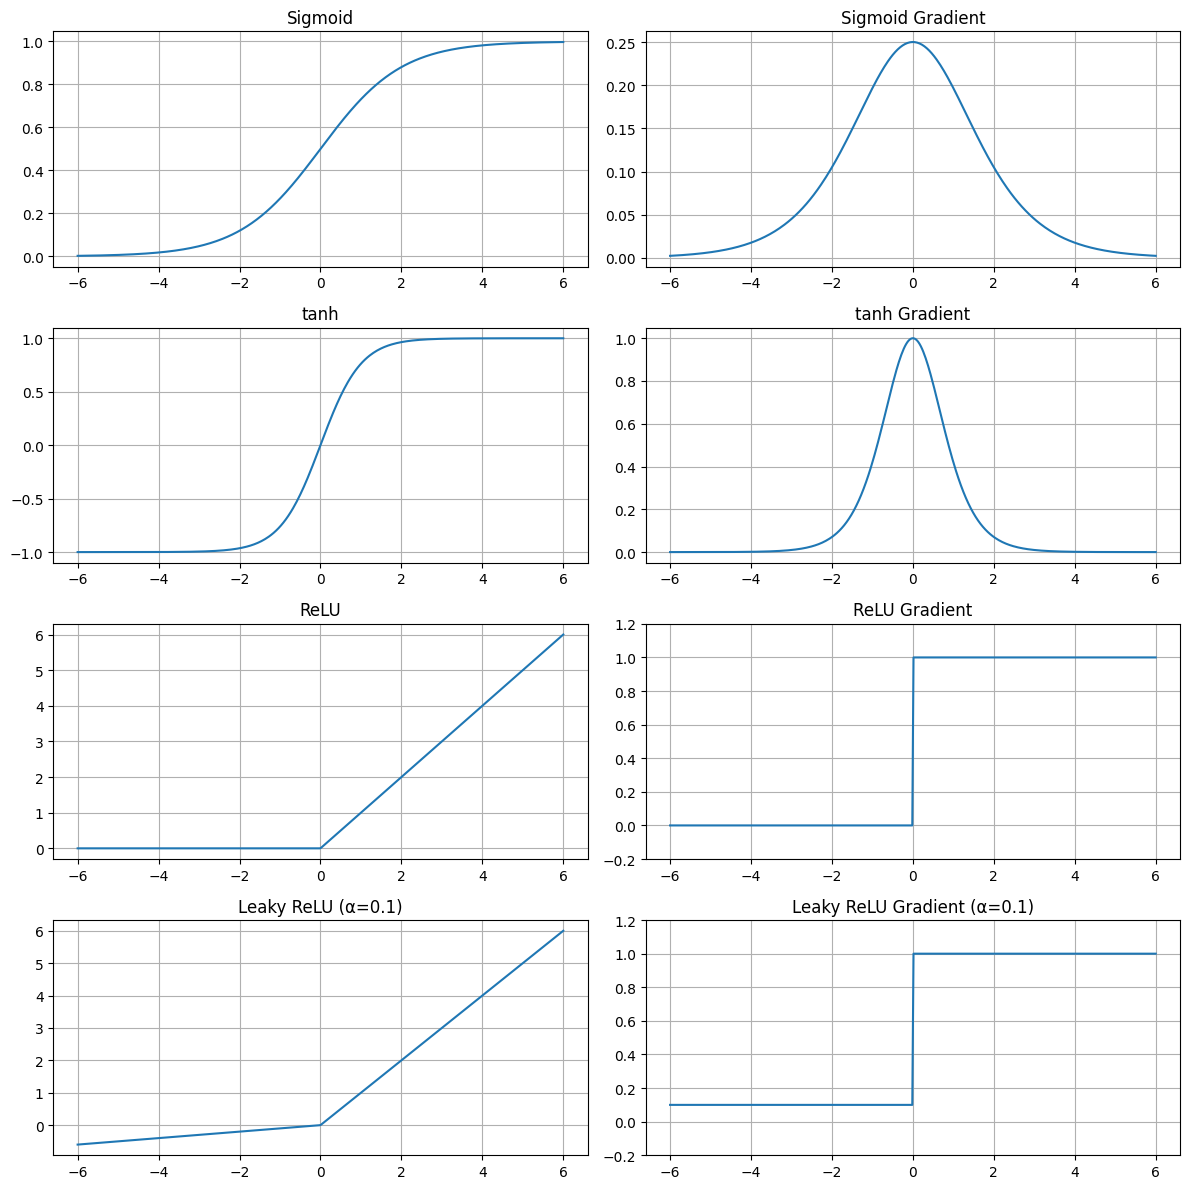

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return np.where(x > 0, 1.0, 0.0)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_grad(x, alpha=0.1):
    return np.where(x > 0, 1.0, alpha)

x = np.linspace(-6, 6, 400)
plt.figure(figsize=(12, 12))

# Sigmoid
plt.subplot(4, 2, 1)
plt.title("Sigmoid")
plt.plot(x, sigmoid(x))
plt.grid(True)

plt.subplot(4, 2, 2)
plt.title("Sigmoid Gradient")
plt.plot(x, sigmoid_grad(x))
plt.grid(True)

# tanh
plt.subplot(4, 2, 3)
plt.title("tanh")
plt.plot(x, tanh(x))
plt.grid(True)

plt.subplot(4, 2, 4)
plt.title("tanh Gradient")
plt.plot(x, tanh_grad(x))
plt.grid(True)

# ReLU
plt.subplot(4, 2, 5)
plt.title("ReLU")
plt.plot(x, relu(x))
plt.grid(True)

plt.subplot(4, 2, 6)
plt.title("ReLU Gradient")
plt.plot(x, relu_grad(x))
plt.ylim(-0.2, 1.2)
plt.grid(True)

# Leaky ReLU
plt.subplot(4, 2, 7)
plt.title("Leaky ReLU (α=0.1)")
plt.plot(x, leaky_relu(x, 0.1))
plt.grid(True)

plt.subplot(4, 2, 8)
plt.title("Leaky ReLU Gradient (α=0.1)")
plt.plot(x, leaky_relu_grad(x, 0.1))
plt.ylim(-0.2, 1.2)
plt.grid(True)

plt.tight_layout()
plt.show()


### Sigmoid 와 tanh 함수의 문제점
 - 양 끝 부분으로 갈 수록 기울기가 0에 가까워지는 문제가 있다. 그래서 모델 업데이트가 잘 안 된다. 특히 신경망이 깊어지면 이 문제가 심각해진다. (Gradient Vanishing)
 - ReLU 도 음수 부분은 그렇지만 (dead ReLU), 양수부분은 그런 문제가 없기 때문에 잘 쓸 수 있다.
 - 역시 ReLU도 문제가 있기는 해서 Leaky ReLU 와 같은 함수들을 사용해서 비 선형성도 가져가면서, 기울기 소실이나 죽은 ReLU를 예방한다. 

### Loss Function

이제 모델이 얼마나 틀렸는지 계산해야, 업데이트를 `미분`을 통해서 할 수 있다는 것 정도는 다 이해 했을 것이다.
그래서 모델이 얼마나 틀렸는지를 계산하는건 굉장히 중요한데,

틀린 수치를 계산하려면 어떤 식으로 계산할지 생각해야한다.

이 계산 함수를 우리는 Loss Function (손실 함수) 라고 한다.


사실 최근 논문들은 모델의 아키텍쳐가 바뀌는 경우도 있긴 하지만, 그거보다 Loss Function 을 이해하는게 훨씬 중요하다

그만큼 머신러닝의 알파이요 오메가가 바로 Loss 이다.


여러 Loss 들이 존재하고, 논문별로도 다 소개가 되지만 일단 전통의 강호를 먼저 몇 가지 소개하겠다.

### MSE (Mean Squared Error)
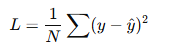
 - 출력이 연속값일때 잘 먹힌다.
 - 차이가 클 수록 패널티가 제곱으로 커진다. 안정적인 학습이 된다.

### Binary Cross Entropy (이진 분류)
 - 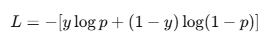
 - 출력층에는 sigmoid 등을 쓴다.
 - 확률이 낮을수록 Loss 가 급격하게 증가한다.

### Cross Entropoy (다중 분류)
 - 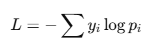
 - 그냥 이진분류식을 늘려놓은거다. (자세히 보면 그렇다.)
 - 원 핫 벡터로 사용되는 y를 사용한다 (하나만 1이고 나머지는 전부 0인 벡터를 one-hot vector 라고 한다.)
 - 출력층은 softmax 등을 쓴다.
 - 딥러닝 분류과제에서 압도적으로 많이 쓰인다. LLM side의 Transformer 도 사실상 다음 나올 토큰을 분류하는 문제라 역시 이걸 많이 쓴다.
 - Cross Entropy 의 수식 유도 과정에 대해서는 Transformer 할 때 다시 다룰 것이다.



이외에도 Triplet Loss, L1 Loss 등등 아주 많은 Loss 들이 있고, 논문들에서도 Loss 를 조금씩 변형해서 쓰거나, GAN 등에서 쓰는 Loss 등이 있는데 그런건 그때 그때 필요할 때 설명 하겠다...
